In [7]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [6]:
coherence_scores_metrics_df = pd.read_excel("output/coherence_scores_archive.xlsx")

In [7]:
coherence_num_topics_grpby = coherence_scores_metrics_df.groupby("topic_num")["coherence_score"].mean().reset_index().sort_values(
    by="coherence_score", ascending=False
).reset_index(drop=True)

coherence_num_topics_grpby["topic_num"] = coherence_num_topics_grpby["topic_num"].astype(int)
coherence_num_topics_grpby = coherence_num_topics_grpby.sort_values("topic_num", ascending=True)

coherence_num_topics_grpby

topic_num  coherence_score
20          5         0.358743
19          6         0.378301
17          7         0.392216
18          8         0.386030
16          9         0.402727
14         10         0.417714
10         11         0.420785
4          12         0.437124
0          13         0.455131
6          14         0.436873
1          15         0.449984
2          16         0.443825
3          17         0.437390
15         18         0.407789
13         19         0.419111
11         20         0.419560
12         21         0.419506
9          22         0.423007
8          23         0.425861
5          24         0.437087
7          25         0.429219

In [8]:
coherence_chunksize_grpby = coherence_scores_metrics_df.groupby("chunksize")["coherence_score"].mean().reset_index().sort_values(
    by="coherence_score", ascending=False
).reset_index(drop=True)

coherence_chunksize_grpby["chunksize"] = coherence_chunksize_grpby["chunksize"].astype(int)

coherence_chunksize_grpby = coherence_chunksize_grpby.sort_values("chunksize", ascending=True)

coherence_chunksize_grpby

chunksize  coherence_score
0         20         0.422819
2         40         0.412173
1         60         0.421864

In [9]:
coherence_numpass_grpby = coherence_scores_metrics_df.groupby("passes_num")["coherence_score"].mean().reset_index().sort_values(
    by="coherence_score", ascending=False
).reset_index(drop=True)

coherence_numpass_grpby["passes_num"] = coherence_numpass_grpby["passes_num"].astype(int)

coherence_numpass_grpby = coherence_numpass_grpby.sort_values("passes_num", ascending=True)

coherence_numpass_grpby

passes_num  coherence_score
2           5         0.418105
1          10         0.419086
0          15         0.419664

In [10]:


coherence_alphs_grpby = coherence_scores_metrics_df.groupby("alpha")["coherence_score"].mean().reset_index().sort_values(
    by="coherence_score", ascending=False
).reset_index(drop=True)

coherence_alphs_grpby

alpha  coherence_score
0   symmetric         0.419569
1  asymmetric         0.418334

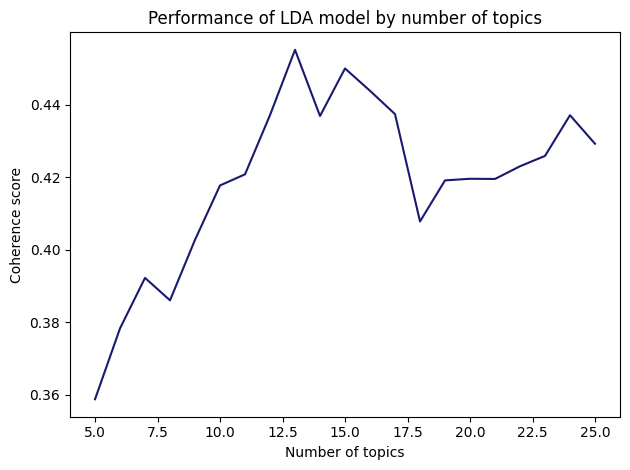

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.lineplot(x=coherence_num_topics_grpby["topic_num"], y=coherence_num_topics_grpby["coherence_score"], color="midnightblue")
plt.title(label='Performance of LDA model by number of topics')
plt.xlabel(xlabel='Number of topics')
plt.ylabel(ylabel='Coherence score')
plt.tight_layout()
plt.show()

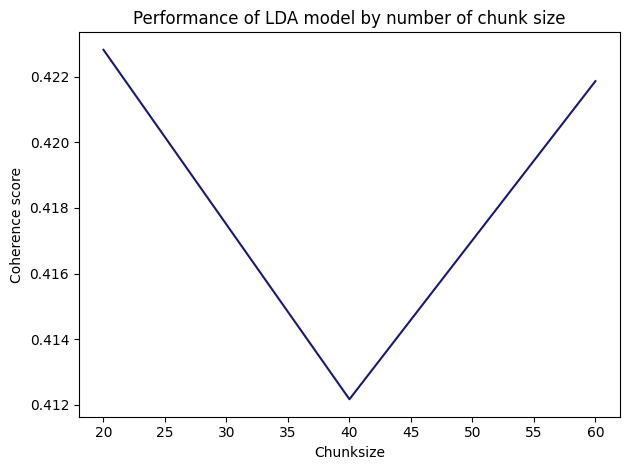

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.lineplot(x=coherence_chunksize_grpby["chunksize"], y=coherence_chunksize_grpby["coherence_score"], color="midnightblue")

plt.title(label='Performance of LDA model by number of chunk size')

plt.xlabel(xlabel='Chunksize')

plt.ylabel(ylabel='Coherence score')

plt.tight_layout()

plt.show()

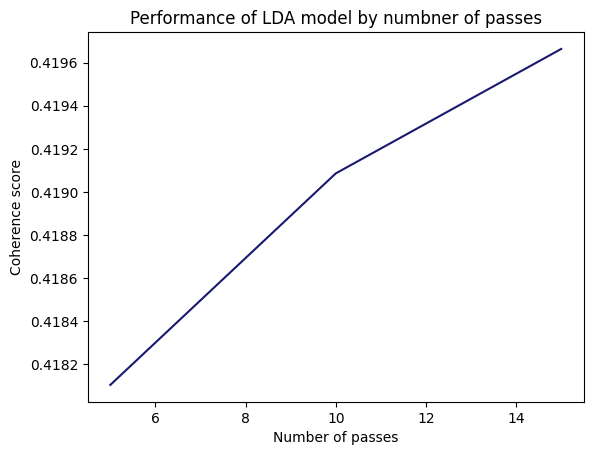

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.lineplot(x=coherence_numpass_grpby["passes_num"], y=coherence_numpass_grpby["coherence_score"], color="midnightblue")

plt.title(label='Performance of LDA model by numbner of passes')

plt.xlabel(xlabel='Number of passes')

plt.ylabel(ylabel='Coherence score')

# plt.tight_layout()

plt.show()

### Visualize model topics

In [8]:
import pickle


with open('output/topic_terms.pickle', 'rb') as f:

    topic_terms = pickle.load(f)



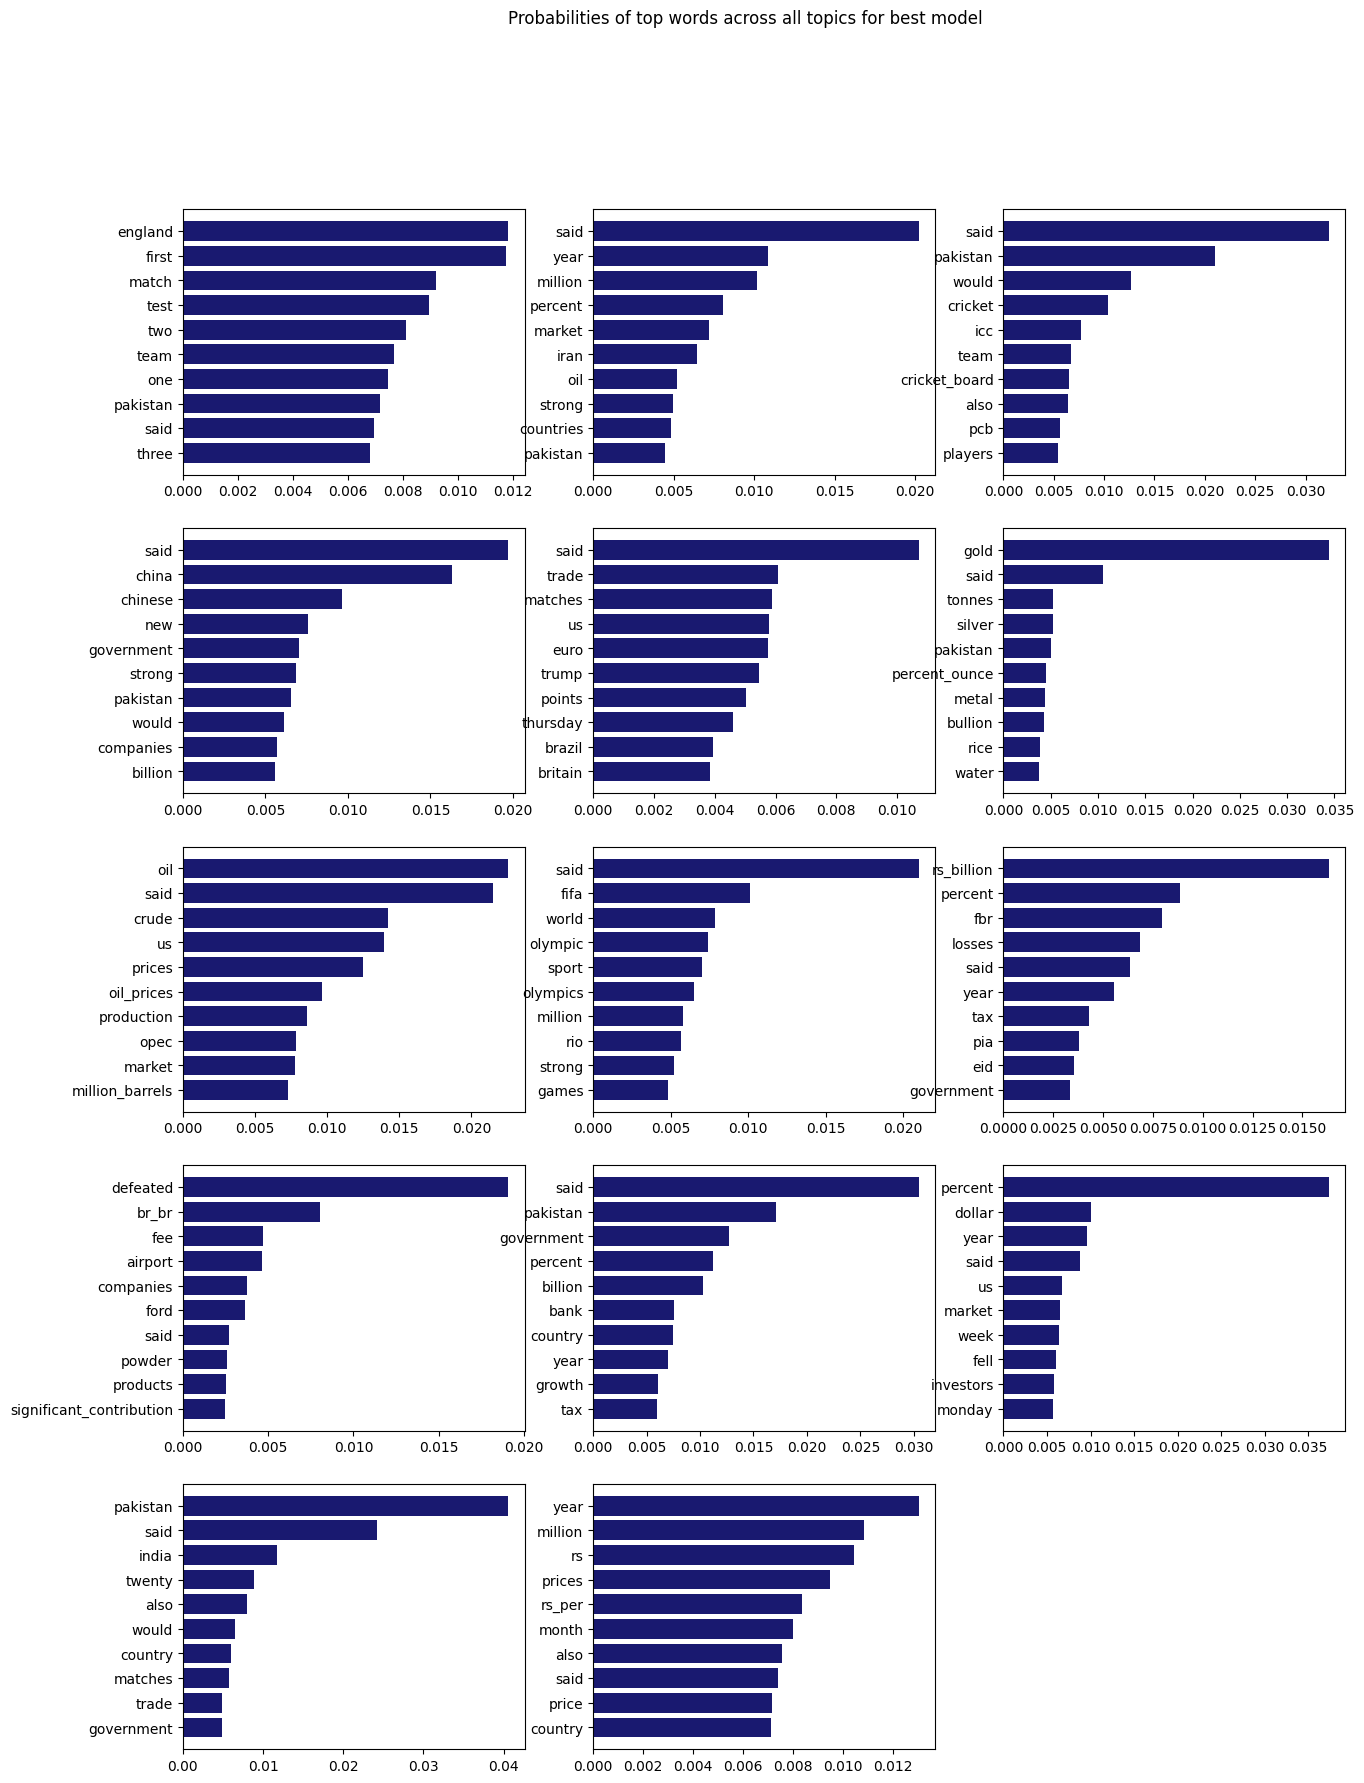

In [9]:

num_topics = len(topic_terms.keys())

top_n = 10

cols = 3
rows = num_topics//cols + 1
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*4))

for a in range(num_topics):
  axs[a//cols, a%cols].barh(y=np.arange(top_n), width=list(topic_terms[a].values()), color='midnightblue' )
  axs[a//cols, a%cols].set_yticks(np.arange(top_n))
  axs[a//cols, a%cols].set_yticklabels(labels=list(topic_terms[a].keys()))
  axs[a//cols, a%cols].invert_yaxis()

for b in range(num_topics, rows*cols):
  axs[b//cols, b%cols].set_axis_off()

fig.suptitle('Probabilities of top words across all topics for best model')
plt.show()